In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest


In [5]:
# load the dataset
df=pd.read_csv(r'C:\Users\sunia\OneDrive\Desktop\Anomoly_detection\embedded_system_network_security_dataset.csv')
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [7]:
# check missing vallues
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

## step 2: data preprocessing


In [11]:
# drop the label column if exists
features=df.drop(columns=['label'])
features.head()


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0,1,1,0,0,0,0,0,0
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0,1,0,0,0,1,0,1,0
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0,1,0,0,1,0,0,0,0
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0,0,0,1,0,0,0,0,0
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,1,0,0,1,0,0,0,1,0


In [12]:
# if columns is bool type then convert it to int type
for col in features.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [16]:
df.dtypes

packet_size              float64
inter_arrival_time       float64
src_port                   int64
dst_port                   int64
packet_count_5s          float64
mean_packet_size         float64
spectral_entropy         float64
frequency_band_energy    float64
label                    float64
protocol_type_TCP          int64
protocol_type_UDP          int64
src_ip_192.168.1.2         int64
src_ip_192.168.1.3         int64
dst_ip_192.168.1.5         int64
dst_ip_192.168.1.6         int64
tcp_flags_FIN              int64
tcp_flags_SYN              int64
tcp_flags_SYN-ACK          int64
dtype: object

In [19]:
features.columns

Index(['packet_size', 'inter_arrival_time', 'src_port', 'dst_port',
       'packet_count_5s', 'mean_packet_size', 'spectral_entropy',
       'frequency_band_energy', 'protocol_type_TCP', 'protocol_type_UDP',
       'src_ip_192.168.1.2', 'src_ip_192.168.1.3', 'dst_ip_192.168.1.5',
       'dst_ip_192.168.1.6', 'tcp_flags_FIN', 'tcp_flags_SYN',
       'tcp_flags_SYN-ACK'],
      dtype='object')

## Feature Engineering

In [21]:
# scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
# convert the scaled features to a dataframe
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [22]:
# --------------------------------------------------
# Step 1: Import Isolation Forest
# --------------------------------------------------
from sklearn.ensemble import IsolationForest


In [23]:
# --------------------------------------------------
# Step 2: Create Isolation Forest Model
# --------------------------------------------------
model = IsolationForest(
    n_estimators=100,      # number of trees
    contamination=0.05,    # expected percentage of anomalies
    max_samples=256,       # sample size for each tree
    random_state=42        # for reproducibility
)


In [24]:
# --------------------------------------------------
# Step 3: Fit the Model on Scaled Features
# --------------------------------------------------
model.fit(scaled_features_df)


IsolationForest(contamination=0.05, max_samples=256, random_state=42)

In [25]:
# --------------------------------------------------
# Step 4: Predict Anomalies
# 1  -> Normal
# -1 -> Anomaly
# --------------------------------------------------
anomaly_labels = model.predict(scaled_features_df)


In [26]:
# --------------------------------------------------
# Step 5: Add Anomaly Column to DataFrame
# --------------------------------------------------
scaled_features_df['anomaly'] = anomaly_labels
scaled_features_df.head()


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK,anomaly
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049,1
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049,1
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049,1


In [27]:
# --------------------------------------------------
# Step 6: Check Number of Normal vs Anomalies
# --------------------------------------------------
scaled_features_df['anomaly'].value_counts()


anomaly
 1    950
-1     50
Name: count, dtype: int64

In [28]:
# --------------------------------------------------
# Step 7: Separate Normal and Anomaly Data
# --------------------------------------------------
normal_data = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomalies = scaled_features_df[scaled_features_df['anomaly'] == -1]


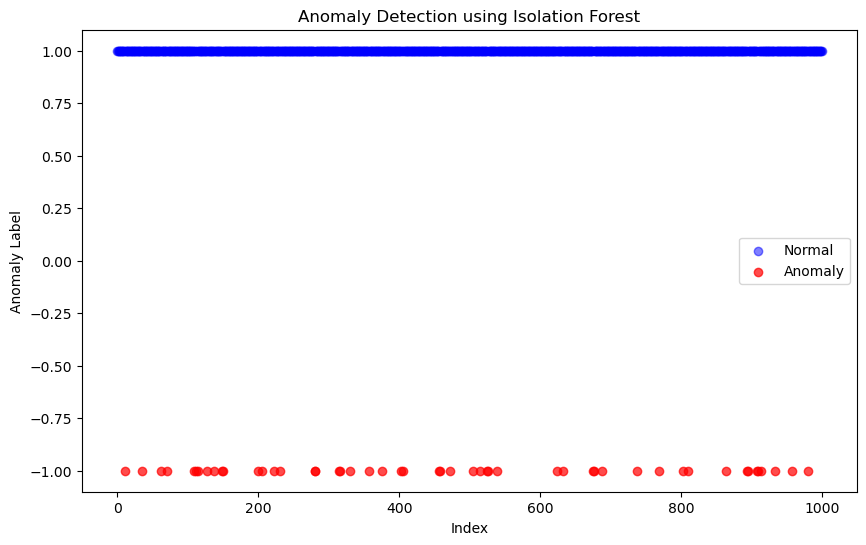

In [29]:
# --------------------------------------------------
# Step 8: Basic Visualization (Index vs Anomaly)
# --------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(normal_data.index,
            normal_data['anomaly'],
            color='blue',
            label='Normal',
            alpha=0.5)

plt.scatter(anomalies.index,
            anomalies['anomaly'],
            color='red',
            label='Anomaly',
            alpha=0.7)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()


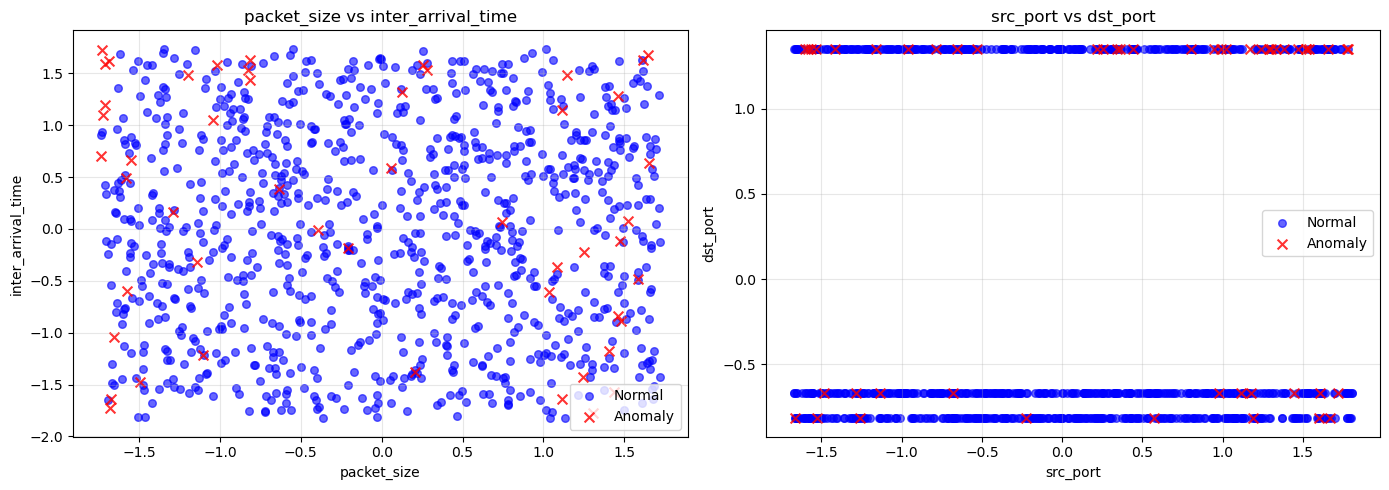

Normal data points: 950
Anomalies detected: 50


In [30]:
# --------------------------------------------------
# Step 9: Visualize Anomalies - Multiple Feature Comparisons
# --------------------------------------------------

# Select first 4 features for visualization
feature_list = scaled_features_df.columns[:4]

normal = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomaly = scaled_features_df[scaled_features_df['anomaly'] == -1]

fig, axes = plt.subplots(1,2, figsize=(14,5))

# Plot 1
axes[0].scatter(normal[feature_list[0]],
                normal[feature_list[1]],
                color='blue',
                label='Normal',
                alpha=0.6,
                s=30)

axes[0].scatter(anomaly[feature_list[0]],
                anomaly[feature_list[1]],
                color='red',
                label='Anomaly',
                alpha=0.8,
                s=50,
                marker='x')

axes[0].set_xlabel(feature_list[0])
axes[0].set_ylabel(feature_list[1])
axes[0].set_title(f'{feature_list[0]} vs {feature_list[1]}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


# Plot 2
axes[1].scatter(normal[feature_list[2]],
                normal[feature_list[3]],
                color='blue',
                label='Normal',
                alpha=0.6,
                s=30)

axes[1].scatter(anomaly[feature_list[2]],
                anomaly[feature_list[3]],
                color='red',
                label='Anomaly',
                alpha=0.8,
                s=50,
                marker='x')

axes[1].set_xlabel(feature_list[2])
axes[1].set_ylabel(feature_list[3])
axes[1].set_title(f'{feature_list[2]} vs {feature_list[3]}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Normal data points:", len(normal))
print("Anomalies detected:", len(anomaly))


In [31]:
# --------------------------------------------------
# Step 10: 4D Visualization using Plotly
# --------------------------------------------------

import plotly.graph_objects as go

normal = scaled_features_df[scaled_features_df['anomaly'] == 1]
anomaly = scaled_features_df[scaled_features_df['anomaly'] == -1]

fig = go.Figure()

# Normal points
fig.add_trace(go.Scatter3d(
    x=normal[feature_list[0]],
    y=normal[feature_list[1]],
    z=normal[feature_list[2]],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal[feature_list[3]],
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title=feature_list[3])
    )
))

# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly[feature_list[0]],
    y=anomaly[feature_list[1]],
    z=anomaly[feature_list[2]],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly[feature_list[3]],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))

fig.update_layout(
    title='4D Scatter Plot (Color = 4th Feature)',
    scene=dict(
        xaxis_title=feature_list[0],
        yaxis_title=feature_list[1],
        zaxis_title=feature_list[2]
    ),
    width=900,
    height=700
)

fig.show()
